In [26]:
#1 - Import libraries

import os
import tempfile
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from decimal import *

import pandas as pd

from datetime import datetime

import numpy as np

from sklearn.model_selection import StratifiedKFold


import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import Model


import keras.backend as K # type: ignore
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense,Dropout, Bidirectional
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.layers.experimental import RandomFourierFeatures

from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from scipy import interp
from itertools import cycle


import dask.dataframe as dd

from sklearn.metrics import roc_auc_score

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler

import tensorflow_addons as tfa

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer

from sklearn.ensemble import IsolationForest



In [4]:
#2 - additional functions

def TSS_matrix_confusion(TN, FP, FN, TP):
    TSS = 0
    
    sensitivity = TP / (TP + FP)
    specificity = TN / (FN + TN)
    TSS = sensitivity + specificity - 1

    return TSS


def HSS_matrix_confusion(TN, FP, FN, TP):
    HSS = 0
    
    HSS = ( 2 * ((TP * TN) - (FN * FP)) ) / ( (TP + FN)* (FN + TN) + (TP + FN) * (FP + TN) )
    
    return HSS

def FAR_matrix_confusion(TN, FP, FN, TP):
    FAR = 0

    FAR = FP/(TP+FP)

    return FAR


def accuracy(y_true, y_pred):
    
    """
    Function to calculate accuracy
    -> param y_true: list of true values
    -> param y_pred: list of predicted values
    -> return: accuracy score
    
    """
    
    # Intitializing variable to store count of correctly predicted classes
    correct_predictions = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == yp:
            
            correct_predictions += 1
    
    #returns accuracy
    return correct_predictions / len(y_true)


def true_positive(y_true, y_pred):
    
    tp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 1:
            tp += 1
    
    return tp


def true_negative(y_true, y_pred):
    
    tn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 0:
            tn += 1
            
    return tn


def false_positive(y_true, y_pred):
    
    fp = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 1 and yp == 0: #01
            fp += 1
            
    return fp


def false_negative(y_true, y_pred):
    
    fn = 0
    
    for yt, yp in zip(y_true, y_pred):
        
        if yt == 0 and yp == 1: #10
            fn += 1
            
    return fn

def macro_precision(y_true, y_pred):
    
    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    for class_ in list(np.unique(y_true)):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        # keep adding precision for all classes
        precision += temp_precision
        
    # calculate and return average precision over all classes
    precision /= num_classes
    
    return precision


def micro_precision(y_true, y_pred):
    

    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in np.unique(y_true):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        # and update overall tp
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp / (tp + fp)
    return precision

def macro_recall(y_true, y_pred):
    
    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize recall to 0
    recall = 0
    
    # loop over all classes
    for class_ in list(np.unique(y_true)):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false negative for current class
        fn = false_negative(temp_true, temp_pred)
        
        
        # compute recall for current class
        temp_recall = tp / (tp + fn + 1e-6)
        
        # keep adding recall for all classes
        recall += temp_recall
        
    # calculate and return average recall over all classes
    recall /= num_classes
    
    return recall

def micro_recall(y_true, y_pred):
    

    # find the number of classes 
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fn = 0
    
    # loop over all classes
    for class_ in np.unique(y_true):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false negative for current class
        # and update overall tp
        fn += false_negative(temp_true, temp_pred)
        
    # calculate and return overall recall
    recall = tp / (tp + fn)
    return recall

def macro_f1(y_true, y_pred):
    
    # find the number of classes
    num_classes = len(np.unique(y_true))

    # initialize f1 to 0
    f1 = 0
    
    # loop over all classes
    for class_ in list(np.unique(y_true)):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        
        # compute true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # compute false negative for current class
        fn = false_negative(temp_true, temp_pred)
        
        # compute false positive for current class
        fp = false_positive(temp_true, temp_pred)

        # compute recall for current class
        temp_recall = tp / (tp + fn + 1e-6)
        
        # compute precision for current class
        temp_precision = tp / (tp + fp + 1e-6)
        
        
        temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)
        
        # keep adding f1 score for all classes
        f1 += temp_f1
        
    # calculate and return average f1 score over all classes
    f1 /= num_classes
    
    return f1

def micro_f1(y_true, y_pred):
    

    #micro-averaged precision score
    P = micro_precision(y_true, y_pred)

    #micro-averaged recall score
    R = micro_recall(y_true, y_pred)

    #micro averaged f1 score
    f1 = 2*P*R / (P + R)    

    return f1


def outliers_generate(x_train, y_train):
    # Inicializar o Isolation Forest
    iso_forest = IsolationForest(contamination=0.05, random_state=0)

    # Aplicar em cada ponto da sequência
    outliers_all = []
    print(x_train.shape)
    for i in range(x_train.shape[1]):  # Para cada ponto na sequência
        outlier_pred = iso_forest.fit_predict(x_train[:, i, :])  # Aplicar apenas nas features
        outliers_all.append(outlier_pred == -1)  # Marcar os outliers

    # Convertendo para um array booleano
    outliers_all = np.array(outliers_all).T
    outliers_iso_forest = x_train[~outliers_all.any(axis=1)]
    outliers_iso_forest_y = y_train[~outliers_all.any(axis=1)]
    print("Outliers identificados com Isolation Forest em cada ponto da sequência:", len(outliers_iso_forest))
    #print(outliers_iso_forest)
    
    x_train_so = x_train[outliers_all.any(axis=1)]
    y_train_so = y_train[outliers_all.any(axis=1)]
    
    print("contagem outliers")
    print(len(x_train), " - ", len(outliers_iso_forest), " - ", len(x_train_so))
  
    
    return x_train_so, y_train_so




def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):
    
    #creating a set of all the unique classes using the actual class list
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict



In [5]:
#3 - models_algoritms

#MLP model
def make_model(METRICS, train_features,output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    

    model = keras.Sequential([
        keras.layers.Dense(
            16, activation='relu',
            input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                            bias_initializer=output_bias),
    ])


    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss=keras.losses.BinaryCrossentropy(),
        #metrics=METRICS
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name="accuracy"),
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ])
    
    return model


#LSTM model
def make_model_LSTM(METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)

    model = Sequential()
    model.add(LSTM(8,input_shape=(18,1),return_sequences=False))#True = many to many #columns number in csv
    model.add(Dense(2,kernel_initializer='normal',activation='linear'))
    model.add(Dense(1,kernel_initializer='normal',activation='linear'))
    model.compile(loss='mse',
                  optimizer ='adam',
                  #metrics=METRICS
                  metrics=[
                    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
                    tf.keras.metrics.AUC(name="auc"),
                    tf.keras.metrics.Precision(name="precision"),
                    tf.keras.metrics.Recall(name="recall"),
                 ])


    return model


def make_model_SVM(METRICS,output_bias=None):
    model = keras.Sequential(
    [
        keras.Input(shape=(18,)), #number of fields in my csv
        RandomFourierFeatures(
            output_dim=4096, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(units=1),
    ]
    )  
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-4),
        loss=keras.losses.hinge,
       #metrics=METRICS,
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name="accuracy"),
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ])
        
    return model


#Transformers Model
def transformer_model(input_shape, n_classes, transfomers_parameters):
    
    print(transfomers_parameters)
    
    model = build_model_transformers(
        n_classes,
        input_shape,
        head_size = transfomers_parameters[0], #256
        num_heads = transfomers_parameters[1], #4
        ff_dim = transfomers_parameters[2], #4
        num_transformer_blocks = transfomers_parameters[3], #4
        mlp_units = transfomers_parameters[4], #128
        mlp_dropout = transfomers_parameters[5], #0.4 
        dropout = transfomers_parameters[6] ,  #0.25
    )   
    

    model.compile(
        loss= transfomers_parameters[7],
        optimizer= transfomers_parameters[8],
          metrics=[
            tf.keras.metrics.BinaryAccuracy(name="accuracy"),
            tf.keras.metrics.AUC(name="auc"),
            tf.keras.metrics.Precision(name="precision"),
            tf.keras.metrics.Recall(name="recall"),
        ]
        )
    
    return model


#transformer-encoder
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs) #inputs
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)

    return x + res

#https://keras.io/examples/timeseries/timeseries_classification_transformer/
def build_model_transformers(
        n_classes,
        input_shape,
        head_size,
        num_heads,
        ff_dim,
        num_transformer_blocks,
        mlp_units,
        dropout=0,
        mlp_dropout=0,
    ):
        inputs = keras.Input(shape=input_shape)
        x = inputs
        for _ in range(num_transformer_blocks):
            x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

        
        x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
        for dim in mlp_units:
            x = layers.Dense(dim, activation="relu")(x) 
            x = layers.Dropout(mlp_dropout)(x)
        
        
        outputs = layers.Dense(1, activation="sigmoid")(x)
        return keras.Model(inputs, outputs)


In [6]:
#4 -  divide datasets

def divide_dataset_chronological(date_chronological, datasets, cleaned_df):
    datasets = date_chronological

    #Datasets for solar cycle A1, A2, A3, A4
    if len(datasets) > 6:
        train_start_date_1 = datasets[0]
        train_end_date_1 = datasets[1]

        train_start_date_2 = datasets[2]
        train_end_date_2 = datasets[3]

        val_start_date = datasets[4]
        val_end_date = datasets[5]

        test_start_date = datasets[6]
        test_end_date = datasets[7]

        #create train sets
        train_df_1 = cleaned_df.loc[(cleaned_df.T_REC >= train_start_date_1) & (cleaned_df.T_REC <= train_end_date_1)]
        train_df_2 = cleaned_df.loc[(cleaned_df.T_REC >= train_start_date_2) & (cleaned_df.T_REC <= train_end_date_2)]
        train_df = dd.concat([train_df_1, train_df_2])
        
    #All dataset
    else:
        train_start_date = datasets[0]
        train_end_date = datasets[1]

        val_start_date = datasets[2]
        val_end_date = datasets[3]

        test_start_date = datasets[4]
        test_end_date = datasets[5]

        #create train sets
        train_df = cleaned_df.loc[(cleaned_df.T_REC >= train_start_date) & (cleaned_df.T_REC <= train_end_date)]


    #create val and test sets
    val_df = cleaned_df.loc[(cleaned_df.T_REC >= val_start_date) & (cleaned_df.T_REC <= val_end_date)]
    test_df = cleaned_df.loc[(cleaned_df.T_REC >= test_start_date) & (cleaned_df.T_REC <= test_end_date)]

    #sort datasets by date
    train_df = train_df.sort_values(by='T_REC')
    val_df = val_df.sort_values(by='T_REC')
    test_df = test_df.sort_values(by='T_REC')
    
    return train_df, val_df, test_df


def divide_dataset_random(cleaned_df):
    #separe A,B,C low-flares
    
    '''
    cleaned_df_A = cleaned_df[cleaned_df['Class_Flare2'].str.contains('A', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('A', case=False, na=False)]
    cleaned_df_B = cleaned_df[cleaned_df['Class_Flare2'].str.contains('B', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('B', case=False, na=False)]
    cleaned_df_C = cleaned_df[cleaned_df['Class_Flare2'].str.contains('C', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('C', case=False, na=False)]
    '''
    
    
    '''
    print("A=> ", len(cleaned_df_A))
    print("B=> ", len(cleaned_df_B))
    print("C=> ", len(cleaned_df_C))
    '''
    
    '''
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('A', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('B', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('X', case=False, na=False)]
    cleaned_df = cleaned_df[~cleaned_df['Class_Flare2'].str.contains('N', case=False, na=False)]
    '''

    #separate positive and negative rows
    df_neg, df_pos = cleaned_df[(mask:=cleaned_df['Class'] == 0)], cleaned_df[~mask]
    
    #splits sets randomly
    train_df_pos, test_df_pos = df_pos.random_split([0.8, 0.2])  
    train_df_pos, val_df_pos = train_df_pos.random_split([0.75, 0.25]) 

    train_df_neg, test_df_neg = df_neg.random_split([0.8, 0.2]) 
    train_df_neg, val_df_neg = train_df_neg.random_split([0.75, 0.25]) 


    train_df =  dd.concat([train_df_pos, train_df_neg])
    val_df = dd.concat([val_df_pos,val_df_neg])
    test_df = dd.concat([test_df_pos, test_df_neg])
    
    #test_df = dd.concat([test_df_pos, test_df_neg, cleaned_df_A, cleaned_df_B])
    #test_df = test_df[~test_df['Class_Flare2'].str.contains('N', case=False, na=False)]
    #test_df = test_df[~test_df['Class_Flare2'].str.contains('C', case=False, na=False)]
    
    print("Train=> ", len(train_df))
    print("Val=> ", len(val_df))
    print("Test=> ", len(test_df))

 

    #order by date dataframe rows
    train_df = train_df.sort_values(by='T_REC')
    val_df = val_df.sort_values(by='T_REC')
    test_df = test_df.sort_values(by='T_REC')
    
    
    #train_df.pop("Class_Flare2")
    #val_df.pop("Class_Flare2")
    #test_df.pop("Class_Flare2")
    
    return train_df, val_df, test_df
    
    
    
def divide_datset_k_fold(cleaned_df):
    
    df = cleaned_df.compute()
    
    # Config StratifiedKFold
    n_splits = 5
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    #"Separate the indices for training and testing"
    folds = []
    for fold, (train_idx, test_idx) in enumerate(skf.split(df, df['Class'])):
        # Slip dateframe
        df_train = df.iloc[train_idx]
        df_test = df.iloc[test_idx]
       
        #"Split the training set into training and validation (80% training, 20% validation)"
        skf_train = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        train_folds = list(skf_train.split(df_train, df_train['Class']))
        train_idx_fold, val_idx_fold = train_folds[fold % 5]  # select fold for training
        
        df_train_split = df_train.iloc[train_idx_fold]
        df_val_split = df_train.iloc[val_idx_fold]
        
        df_train_split = df_train_split.sort_values(by='T_REC')
        df_val_split = df_val_split.sort_values(by='T_REC')
        df_test = df_test.sort_values(by='T_REC')
        
        #df_train_split.pop("Class_Flare2")
        #df_val_split.pop("Class_Flare2")
        #df_test.pop("Class_Flare2")
        
        
        folds.append((df_train_split, df_val_split, df_test))  
        
    
    for i in range(5):
        train_df, val_df, test_df = folds[i]
        neg_t = len(train_df.loc[(train_df['Class'] == 0)])
        pos_t = len(train_df.loc[(train_df['Class'] == 1)])
        
        print("Positivo:", pos_t, " Negativo:", neg_t, " Fold: ", i)
        
    return folds    

 
    
def count_train_val_test(train_df, val_df, test_df):
    #4.2 count train, val, test sets

    neg_t = len(train_df [train_df.Class == 0])
    pos_t = len(train_df [train_df.Class == 1])

    print("\n Train: neg=>", neg_t, " pos=>", pos_t)


    neg_v = len(val_df [val_df .Class == 0])
    pos_v = len(val_df [val_df .Class == 1])

    print("\nVal: neg=>", neg_v, " pos=>", pos_v)

    neg_te = len(test_df [test_df .Class == 0])
    pos_te = len(test_df [test_df .Class == 1])

    print("\nTest: neg=>", neg_te, " pos=>", pos_te)
    
def calculate_class_weight(train_df):

    neg = len(train_df [train_df.Class == 0])
    pos = len(train_df [train_df.Class == 1])

    total = pos  + neg
    weight_for_0 = (1 / neg) * (total / 2.0)
    weight_for_1 = (1 / pos) * (total / 2.0)

    class_weight = {0: weight_for_0, 1: weight_for_1}

    print('Weight class 0: {:.2f}'.format(weight_for_0))
    print('Weight class 1: {:.2f}'.format(weight_for_1))
    print(class_weight)
    
    return class_weight
        

In [7]:
#5 - balancing

def smote_balancing(train_df):
    train_df['T_REC'] = train_df['T_REC'].apply(lambda x: x.value)
    X = train_df.loc[:, train_df.columns != 'Class']
    y = train_df.Class
    sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=100)
    X_res, y_res = sm.fit_resample(X, y)
    
    train_df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
    
    train_df['T_REC'] = train_df['T_REC'].apply(pd.Timestamp)

    train_df = train_df.sort_values(by='T_REC')

    train_df = dd.from_pandas(train_df, npartitions=10)
    
    return train_df


def oversampling_balancing(train_df):
    pos_flare = train_df[train_df['Class']==1]
    neg_flare = train_df[train_df['Class']==0]

    pos_flare = pos_flare.sample(frac = len(neg_flare) / len(pos_flare), replace = True, random_state=101)
    train_df = dd.concat([pos_flare, neg_flare], interleave_partitions=True)   
    train_df.sort_values(by='T_REC')
    
    return train_df

def undersampling_balancing(train_df):
    pos_flare = train_df[train_df['Class']==1]
    neg_flare = train_df[train_df['Class']==0]
    
    print(len(neg_flare), - len(pos_flare))

    neg_flare = neg_flare.sample(frac= 1 / ( len(neg_flare)/len(pos_flare)) , random_state=101)
    train_df = dd.concat([pos_flare, neg_flare], interleave_partitions=True)   
    train_df.sort_values(by='T_REC')
    
    return train_df







In [8]:
#6 - normalization

def normalization_data(train_features, val_features, test_features, method):
        
    #Dataset normalization - StandardScaler
    scalerS = StandardScaler()
    scalerR = RobustScaler()
    scalerM = MinMaxScaler()
    scalerL = Normalizer(norm='l1')
    
    #quantile Transformer method
    transformerJ = PowerTransformer(method='yeo-johnson')
    transformer = QuantileTransformer(output_distribution='normal')  # ou 'uniform' or 'normal'
    
    scaler = scalerS
    
    if method == "Standard":
        scaler == scalerS
    elif method == "Robust":
        scaler == scalerR
    elif method == "MinMax":
        scaler == scalerM
    elif method == "Normalizer":
        scaler == scalerL
    elif method == "PowerTransformer":
        scaler = transformerJ
    elif method == "QuantileTransformer":
        scaler = transformer


    train_features = train_features.astype(float)
    val_features = val_features.astype(float)
    test_features = test_features.astype(float)
    
 

    '''
    shift_train = abs(np.min(train_features)) + 1
    train_shifted = train_features + shift_train
    train_features = np.log(train_shifted)
    
    
    shift_val = abs(np.min(val_features)) + 1
    val_shifted = val_features + shift_val
    val_features = np.log(val_shifted)
    
    shift_test = abs(np.min(test_features)) + 1
    test_shifted = test_features + shift_test
    test_features = np.log(test_shifted)
    '''


    train_features = scaler.fit_transform(train_features)
    val_features = scaler.transform(val_features)
    test_features = scaler.transform(test_features)

    train_features = np.clip(train_features, -5, 5)
    val_features = np.clip(val_features, -5, 5)
    test_features = np.clip(test_features, -5, 5)
    
    return train_features, val_features, test_features




In [20]:
#7 - average and standard
def average_standard_derivation(set_experiment, set_dataset_base, set_window, set_model_name, set_balancing, set_dataset_division, set_batch, set_epoch, thoud):    
    
    df_save = pd.read_csv('data/result_models_test.csv')

    df_query = df_save[(df_save['experiment'] == set_experiment) &(df_save['thoud'] == thoud) &(df_save['fold'].isin(["0", "1", "2", "3", "4"]))]

    
    print("thoud: ", thoud)
    print("qtde:", df_query.shape[0])
    
    df_numericas = df_query.select_dtypes(include=['number'])
    mean = df_numericas.mean()
    standard_deviation = df_numericas.std()



    #mean
    
    metric_list = []
    metric_list.append(set_experiment)
    metric_list.append("average")
    metric_list.append(set_dataset_base)
    metric_list.append(set_window)
    metric_list.append(set_model_name)
    metric_list.append(set_balancing)
    metric_list.append(set_dataset_division)
    metric_list.append(set_batch)
    metric_list.append(set_epoch)
    metric_list.append(thoud)
    metric_list.append(mean[4])
    metric_list.append(mean[5])
    metric_list.append(mean[6])
    metric_list.append(mean[7])
    metric_list.append(mean[8])
    metric_list.append(mean[9])
    metric_list.append(mean[10])
    metric_list.append(mean[11])
    metric_list.append(mean[12])
    metric_list.append(mean[13])
    metric_list.append(mean[14])
    metric_list.append(mean[15])
    metric_list.append(mean[16])
    metric_list.append(mean[17])
    metric_list.append(mean[18])
    metric_list.append(mean[19])
    
    

    df_results_average = pd.DataFrame(metric_list).T
    df_results_average.columns = ["experiment", "fold", "dataset", "window", "model", "balancing", "sep_datasets", "batch", "epoch","thoud",  "TP", "TN", "FP", "FN", "Acurácia", "TSS" ,"HSS" ,"AUC/ROC" ,"FAR" ,"LOSS" ,"Macro Precision" ,"Micro Precision" ,"Macro Recall" ,"Micro Recall" ,"Macro F1" ,"Micro F1"]

    
    if os.path.isfile('data/result_models_test.csv'):
        df_results_average.to_csv('data/result_models_test.csv', index= False, header=False, mode = 'a')
    else:
        df_results_average.to_csv('data/result_models_test.csv', index= False, header=True, mode = 'a')
    
    
    
    #standard_deviation
    
    metric_list = []
    metric_list.append(set_experiment)
    metric_list.append("standard_derivation")
    metric_list.append(set_dataset_base)
    metric_list.append(set_window)
    metric_list.append(set_model_name)
    metric_list.append(set_balancing)
    metric_list.append(set_dataset_division)
    metric_list.append(set_batch)
    metric_list.append(set_epoch)
    metric_list.append(thoud)
    metric_list.append(standard_deviation[4])
    metric_list.append(standard_deviation[5])
    metric_list.append(standard_deviation[6])
    metric_list.append(standard_deviation[7])
    metric_list.append(standard_deviation[8])
    metric_list.append(standard_deviation[9])
    metric_list.append(standard_deviation[10])
    metric_list.append(standard_deviation[11])
    metric_list.append(standard_deviation[12])
    metric_list.append(standard_deviation[13])
    metric_list.append(standard_deviation[14])
    metric_list.append(standard_deviation[15])
    metric_list.append(standard_deviation[16])
    metric_list.append(standard_deviation[17])
    metric_list.append(standard_deviation[18])
    metric_list.append(standard_deviation[19])
    
    
    df_results_standard = pd.DataFrame(metric_list).T
    df_results_standard.columns = ["experiment", "fold", "dataset", "window", "model", "balancing", "sep_datasets", "batch", "epoch","thoud",  "TP", "TN", "FP", "FN", "Acurácia", "TSS" ,"HSS" ,"AUC/ROC" ,"FAR" ,"LOSS" ,"Macro Precision" ,"Micro Precision" ,"Macro Recall" ,"Micro Recall" ,"Macro F1" ,"Micro F1"]


    
    if os.path.isfile('data/result_models_test.csv'):
        df_results_standard.to_csv('data/result_models_test.csv', index= False, header=False, mode = 'a')
    else:
        df_results_standard.to_csv('data/result_models_test.csv', index= False, header=True, mode = 'a')
        


In [10]:
#8 - prepare models

def prepare_model_transformer(train_features, val_features, test_features, train_labels, val_labels, test_labels, transformers_parameters):
    x_train  = train_features
    x_val = val_features
    x_test = test_features

    y_train  = train_labels
    y_val = val_labels
    y_test = test_labels

    y_train = y_train.astype(int)
    y_val = y_val.astype(int)
    y_test = y_test.astype(int)
    
    n_classes = len(np.unique(y_train))

    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
    x_val = x_val.reshape((x_val.shape[0], x_val.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
    
    

    idx = np.random.permutation(len(x_train))
    x_train = x_train[idx]
    y_train = y_train[idx]


    input_shape = x_train.shape[1:]
    
    print("Shape de X_train:", x_train.shape)
    print("Shape de y_train:", y_train.shape)

    #remove outliers
    #x_train, y_train = outliers_generate(x_train, y_train)

    model = transformer_model(input_shape, n_classes, transformers_parameters)
    
    return model, input_shape, n_classes, x_train, y_train, x_val, y_val, x_test, y_test


def fit_model_transformers(set_balancing, model, set_epoch, set_batch, callbacks, class_weight, x_train, y_train, x_val, y_val):
    #Check use class weight
    if set_balancing == 'weight':
        history = model.fit(
            x_train,
            y_train,
            validation_data=(x_val, y_val),
            epochs=set_epoch,
            batch_size=set_batch,
            verbose = 1,
            callbacks=callbacks,
            class_weight = class_weight,   
        )
    else:
        history = model.fit(
        x_train,
        y_train,
        validation_data=(x_val, y_val),
        epochs=set_epoch,
        batch_size=set_batch,
        verbose = 1,
        callbacks=callbacks,
        )
        
    return history

def fit_others_models(set_balancing, model, set_batch, set_epoch, callbacks, class_weight, train_features, train_labels, val_features, val_labels):
    if set_balancing == "weight":
        history = model.fit(
                train_features,
                train_labels,
                batch_size=set_batch,
                epochs=set_epoch,
                callbacks= callbacks,
                validation_data=(val_features, val_labels),
                class_weight=class_weight)
    else:
        history = model.fit(
        train_features,
        train_labels,
        batch_size=set_batch,
        epochs=set_epoch,
        callbacks= callbacks,
        validation_data=(val_features, val_labels),
        )
        
    return history



#generate salve train_val 

def save_train_val_metrics(history, set_experiment, set_execution):
    
    # Recuperar os valores de AUC
    train_accuracy_history = history.history['accuracy']  
    val_accuracy_history = history.history['val_accuracy'] 


    train_auc_history = history.history['auc']  
    val_auc_history = history.history['val_auc'] 


    train_loss_history = history.history['loss']  
    val_loss_history = history.history['val_loss'] 


    train_precision_history = history.history['precision']  
    val_precision_history = history.history['val_precision'] 


    train_recall_history = history.history['recall']  
    val_recall_history = history.history['val_recall'] 


    # Criar um DataFrame para armazenar os valores da AUC
    df_metrics_data = pd.DataFrame({
        'experiment': set_experiment,
        'n_execution': set_execution,
        'epoch': range(1, len(train_auc_history) + 1),
        'train_accuracy': train_accuracy_history,
        'val_accuracy': val_accuracy_history,
        'train_auc': train_auc_history,
        'val_auc': val_auc_history,
        'train_loss': train_loss_history,
        'val_loss': val_loss_history,
        'train_precision': train_precision_history,
        'val_precision': val_precision_history,
        'train_recall': train_recall_history,
        'val_recall': val_recall_history
    })
    
    
    df_metrics_data.columns = ["experiment", "fold", "epoch",  "train_accuracy", "val_accuracy", "train_auc", "val_auc", "train_loss", "val_loss", "train_precision", "val_precision", "train_recall", "val_recall"]

    
    if os.path.isfile('data/result_models_train_val.csv'):
         df_metrics_data.to_csv('data/result_models_train_val.csv', index= False, header=False, mode = 'a')
    else:
         df_metrics_data.to_csv('data/result_models_train_val.csv', index= False, header=True, mode = 'a')
    

    
def save_test_metrics(set_experiment, set_execution, set_dataset_base, set_window, set_model_name, set_balancing, set_dataset_division, set_batch, set_epoch, model, x_features, y_labels):
    
    x_orig = x_features
    y_orig = y_labels
    
    SCORE = model.evaluate(x_orig, y_orig, verbose=1)
    print('Score:', SCORE)

    #get loss metric
    loss = -1
    for name, value in zip(model.metrics_names, SCORE):
        if name == "loss":
            loss = value


    #4.13 Model Predict    
    tes = model.predict(x_orig)
    y_pred_prob =  []
    
    for t in tes:
        y_pred_prob.append(t[0])
 
    y_pred_prob = np.array(y_pred_prob)
    

    

    thoud = [0.30, 0.35, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50]
   
    for th in thoud:
        y_pred = (y_pred_prob >= th).astype("int32")  # Class convert 0 ou 1


        #4.14 Show confusion matrix and results

        labels = ["NEGATIVE", "POSITIVE"]
        cm = confusion_matrix(y_orig, y_pred)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)

        disp.plot()

        #4.15 Get metrics' results 

        tp = true_positive(y_orig, y_pred)
        fp = false_positive(y_orig, y_pred)
        tn = true_negative(y_orig, y_pred)
        fn = false_negative(y_orig, y_pred)

        val_TSS = TSS_matrix_confusion(tn, fp, fn, tp)
        val_HSS = HSS_matrix_confusion(tn, fp, fn, tp)
        val_FAR = FAR_matrix_confusion(tn, fp, fn, tp)

        print("TP: ", tp)
        print("TN ", tn)
        print("FP ", fp) 
        print("FN: ", fn) 


        print("TSS: ", val_TSS)
        print("HSS: ", val_HSS)
        print("FAR: ", val_FAR)
        print("LOSS:",loss)

        print("ROC AUC: ", roc_auc_score_multiclass(y_orig, y_pred)[1])
        print("Accuracy: ", accuracy(y_orig, y_pred))
        print("Macro precision: ", macro_precision(y_orig, y_pred))
        print("Micro precision: ", micro_precision(y_orig, y_pred))
        print("Macro Recall: ", macro_recall(y_orig, y_pred))
        print("Micro Recall: ", micro_recall(y_orig, y_pred))
        print("Macro F1: ", macro_f1(y_orig, y_pred))
        print("Micro F1: ", micro_f1(y_orig, y_pred))


        #4.16 - Salve metrics' results in .csv file
        metric_list = []
        metric_list.append(set_experiment)
        metric_list.append(set_execution)
        metric_list.append(set_dataset_base)
        metric_list.append(set_window)
        metric_list.append(set_model_name)
        metric_list.append(set_balancing)
        metric_list.append(set_dataset_division)
        metric_list.append(set_batch)
        metric_list.append(set_epoch)
        metric_list.append(th)
        metric_list.append(tp)
        metric_list.append(tn)
        metric_list.append(fp)
        metric_list.append(fn)
        metric_list.append(accuracy(y_orig, y_pred))
        metric_list.append(val_TSS)
        metric_list.append(val_HSS)
        metric_list.append(roc_auc_score_multiclass(y_orig, y_pred)[1])
        metric_list.append(val_FAR)
        metric_list.append(loss)
        metric_list.append(macro_precision(y_orig, y_pred))
        metric_list.append(micro_precision(y_orig, y_pred))
        metric_list.append(macro_recall(y_orig, y_pred))
        metric_list.append(micro_recall(y_orig, y_pred))
        metric_list.append(macro_f1(y_orig, y_pred))
        metric_list.append(micro_f1(y_orig, y_pred))

    
        df_results = pd.DataFrame(metric_list).T
        df_results.columns = ["experiment", "fold", "dataset", "window", "model", "balancing", "sep_datasets", "batch", "epoch","thoud",  "TP", "TN", "FP", "FN", "Acurácia", "TSS" ,"HSS" ,"AUC/ROC" ,"FAR" ,"LOSS" ,"Macro Precision" ,"Micro Precision" ,"Macro Recall" ,"Micro Recall" ,"Macro F1" ,"Micro F1"]

        
        if os.path.isfile('data/result_models_test.csv'):
            df_results.to_csv('data/result_models_test.csv', index= False, header=False, mode = 'a')
        else:
            df_results.to_csv('data/result_models_test.csv', index= False, header=True, mode = 'a')
        
   
        
            
        

    

In [11]:
#9 - execute models

def execute_all_models(set_experiment, set_dataset_base, set_window, set_batch, set_epoch, cleaned_df, set_model_name, set_balancing, set_dataset_division, date_chronological, transformers_parameters):
   

    if set_dataset_division == 'chronological': 
        train_df, val_df, test_df = divide_dataset_chronological(date_chronological, date_chronological, cleaned_df)
        count_train_val_test(train_df, val_df, test_df)
    elif set_dataset_division == 'random':
        train_df, val_df, test_df = divide_dataset_random(cleaned_df)
        count_train_val_test(train_df, val_df, test_df)
    elif set_dataset_division == 'kfold':
        folds = divide_datset_k_fold(cleaned_df)
      
    print("test kfold")  
     
    if set_dataset_division == "kfold":
        fold = 5
    else:
        fold = 1
      
    print("for do kfold")
      
    for n_execution in range(fold): 

        
        if set_dataset_division == "kfold":
            train_df, val_df, test_df = folds[n_execution]
     
    
        class_weight = calculate_class_weight(train_df)
        
        #4.4 Balancing training set
        if set_balancing == 'smote':
            train_df = smote_balancing(train_df)
        elif set_balancing == 'oversampling':
            train_df = oversampling_balancing(train_df)
        elif set_balancing == 'undersampling':
            train_df = undersampling_balancing(train_df)
        
        
        count_train_val_test(train_df, val_df, test_df) 


        #4.6 Clean keys before training
        train_df.pop('T_REC')
        val_df.pop('T_REC')
        test_df.pop('T_REC')

        train_df.pop('harpnum')
        val_df.pop('harpnum')
        test_df.pop('harpnum')
        
   

    
        #4.7 Form np arrays of labels and features.
        train_labels = np.array(train_df.pop('Class'))
        bool_train_labels = train_labels != 0
        val_labels = np.array(val_df.pop('Class'))
        test_labels = np.array(test_df.pop('Class'))


        #4.8 Create features from each dataset
        train_features = np.array(train_df)
        val_features = np.array(val_df)
        test_features = np.array(test_df)

       
        
        train_features, val_features, test_features = normalization_data(train_features, val_features, test_features, "Standard")
        
     
        callbacks = transformers_parameters[9]

        if set_model_name == "transformers" :
            model, input_shape, n_classes, x_train, y_train, x_val, y_val, x_test, y_test = prepare_model_transformer(train_features, val_features, test_features, train_labels, val_labels, test_labels, transformers_parameters)
            history = fit_model_transformers(set_balancing, model, set_epoch, set_batch, callbacks, class_weight, x_train, y_train, x_val, y_val)
            
            save_train_val_metrics(history, set_experiment, n_execution)

            save_test_metrics(set_experiment, n_execution, set_dataset_base, set_window, set_model_name, set_balancing, set_dataset_division, set_batch, set_epoch, model, x_test, y_test)

        else:
            METRICS = ["accuracy"]
            if set_model_name == "mlp":
                model = make_model(METRICS,train_features)
            elif set_model_name == "lstm":
                model = make_model_LSTM(METRICS)
            elif set_model_name == "svm":
                model = make_model_SVM(METRICS)
                
            history = fit_others_models(set_balancing, model, set_batch, set_epoch, callbacks, class_weight, train_features, train_labels, val_features, val_labels)
            
            save_train_val_metrics(history, set_experiment, n_execution)
    
            save_test_metrics(set_experiment, n_execution, set_dataset_base, set_window, set_model_name, set_balancing, set_dataset_division, set_batch, set_epoch, model, test_features, test_labels)

       




In [31]:
#10 - callbacks

def early_stopping(monitor, patience, verbose, restoreWeight):
    early_stopping = EarlyStopping(
        monitor=monitor,       # Métrica a ser monitorada val_accuracy val_loss
        patience=patience,              # Número de épocas sem melhoria para interromper o treinamento
        verbose=verbose,                # Verbose para exibir mensagens durante o treinamento
        restore_best_weights=restoreWeight # Restaura os melhores pesos quando o treinamento é interrompido
    )
    
    return early_stopping



def model_checkpoint(monitor, salve, mode, verbose):
    
    checkpoint_callback = ModelCheckpoint(
        'best_model_transformers.keras',  # Caminho para salvar o modelo
        monitor=monitor,  # Métrica para monitorar
        save_best_only=salve,  # Salvar apenas o modelo com a melhor métrica
        mode=mode,  # Modo para monitorar a métrica (min para perda, max para precisão)
        verbose=verbose  # Verbose level
    )
    
    return checkpoint_callback


def lr_schedule(epoch, lr):
# Exemplo simples: decaimento exponencial da taxa de aprendizado
    if epoch < 5:
        return lr  # Use a taxa de aprendizado inicial
    else:
        return lr * 0.95  # Decaimento a cada época após a 5ª
    
    


def binary_focal_loss(gamma=2., alpha=0.25):
    """
    Implementação da Binary Focal Loss.
    Args:
        gamma: Fator de foco (controla o impacto das amostras bem classificadas)
        alpha: Peso para a classe positiva
    """
    def focal_loss(y_true, y_pred):
    
        epsilon = K.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

    
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weight = alpha * y_true * (1 - y_pred) ** gamma + (1 - alpha) * (1 - y_true) * y_pred ** gamma
        loss = weight * cross_entropy

        return tf.reduce_mean(loss)

    return focal_loss

Lenght before drop nan values:  12488
Lenght after drop nan values:  11732
108  -  all  -  24h  -  8  -  1  -  transformers  -  weight  - 
Positivo: 392  Negativo: 7116  Fold:  0
Positivo: 391  Negativo: 7117  Fold:  1
Positivo: 392  Negativo: 7117  Fold:  2
Positivo: 392  Negativo: 7117  Fold:  3
Positivo: 392  Negativo: 7117  Fold:  4
test kfold
for do kfold
Weight class 0: 0.53
Weight class 1: 9.58
{0: 0.5275435637998875, 1: 9.576530612244897}

 Train: neg=> 7116  pos=> 392

Val: neg=> 1780  pos=> 97

Test: neg=> 2224  pos=> 123
Shape de X_train: (7508, 18, 1)
Shape de y_train: (7508,)
[256, 8, 1024, 8, [128], 0.1, 0.1, 'binary_crossentropy', <keras.optimizers.optimizer_v2.adam.Adam object at 0x000001B6C5180400>, [<keras.callbacks.EarlyStopping object at 0x000001B6C5180DC0>, [<keras.callbacks.ModelCheckpoint object at 0x000001B6C5180C10>]]]
74/74 [==============================] - 15s 202ms/step - loss: 0.5222 - accuracy: 0.8705 - auc: 0.5317 - precision: 0.0791 - recall: 0.1382
Sco

c:\ProgramData\anaconda3\envs\ambient-old-svm-5\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:136: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


TP:  85
TN  1220
FP  38
FN:  1004
TSS:  0.2396180616482424
HSS:  0.03457265991859486
FAR:  0.3089430894308943
LOSS: 0.607903242111206
ROC AUC:  0.6198090308241211
Accuracy:  0.556028973157222
Macro precision:  0.6198090278916193
Micro precision:  0.556028973157222
Macro Recall:  0.5239232908816829
Micro Recall:  0.556028973157222
Macro F1:  0.420505039590303
Micro F1:  0.556028973157222
TP:  83
TN  1294
FP  40
FN:  930
TSS:  0.25663128034158045
HSS:  0.03895507919253194
FAR:  0.3252032520325203
LOSS: 0.607903242111206
ROC AUC:  0.6283156401707902
Accuracy:  0.5867064337452067
Macro precision:  0.6283156372969059
Micro precision:  0.5867064337452067
Macro Recall:  0.525974919342429
Micro Recall:  0.5867064337452067
Macro F1:  0.43675051390812764
Micro F1:  0.5867064337452067
TP:  78
TN  1352
FP  45
FN:  872
TSS:  0.24206001052816273
HSS:  0.0384982339859591
FAR:  0.36585365853658536
LOSS: 0.607903242111206
ROC AUC:  0.6210300052640815
Accuracy:  0.6092884533446954
Macro precision:  0.62

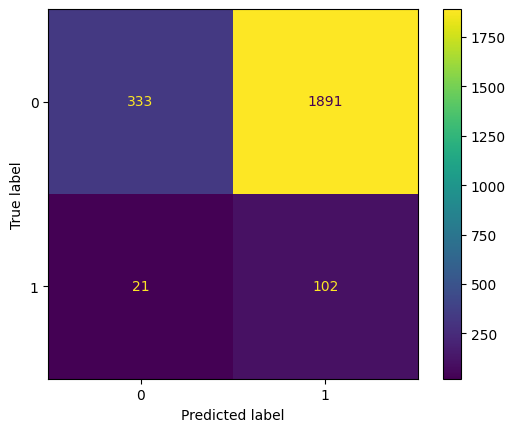

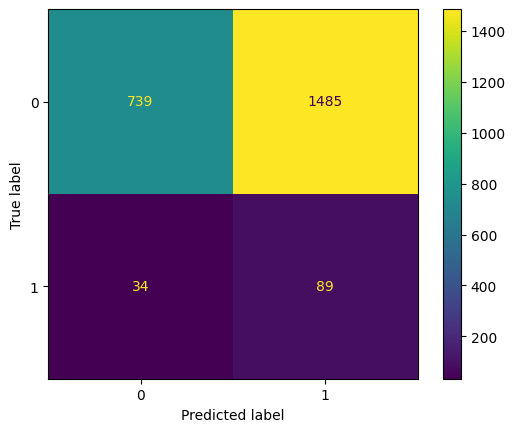

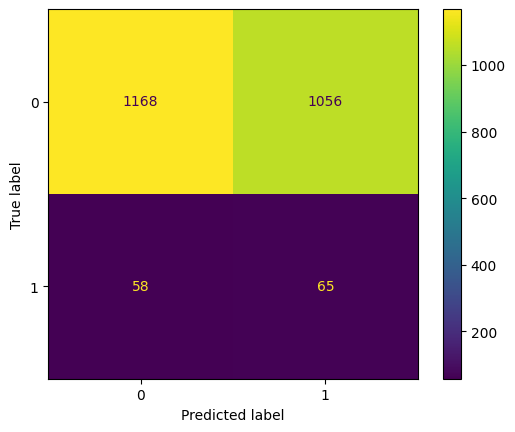

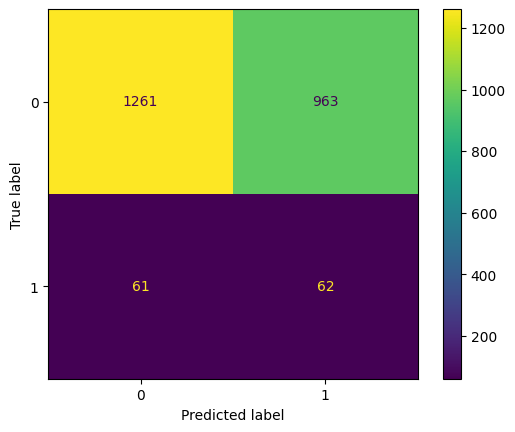

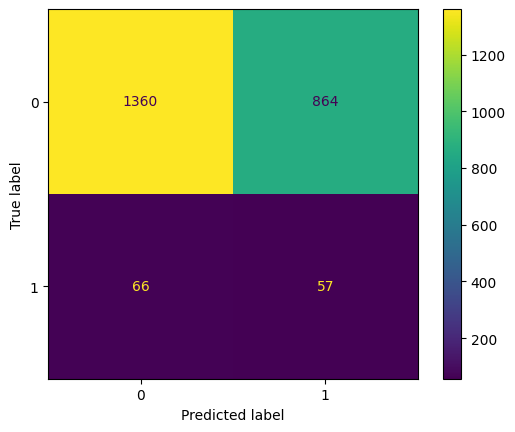

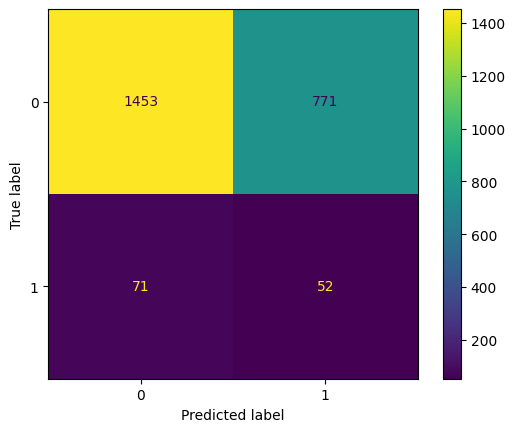

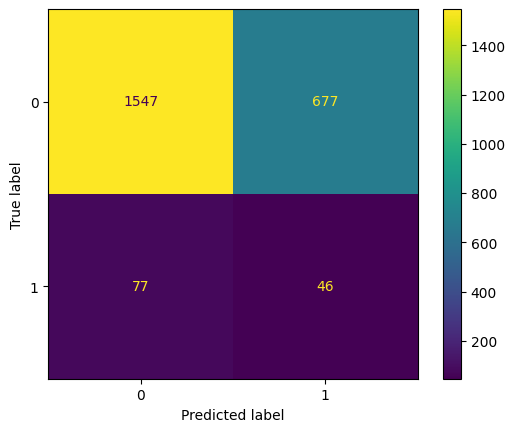

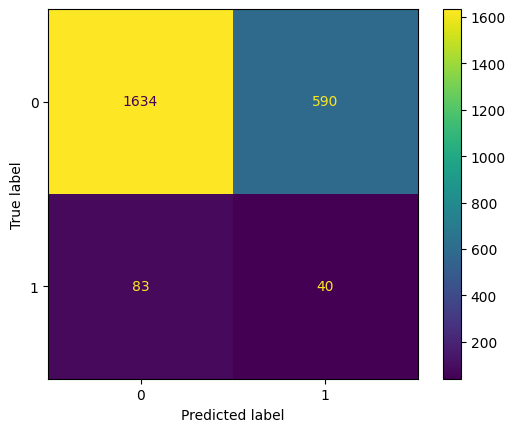

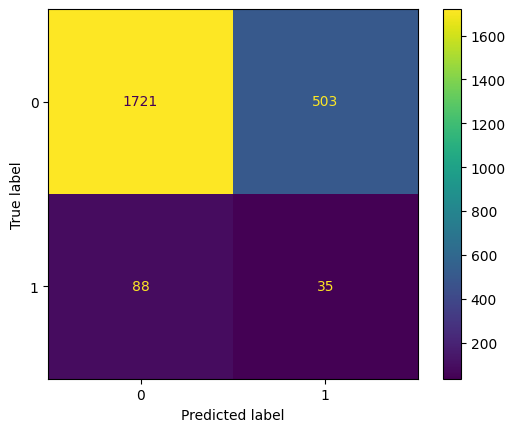

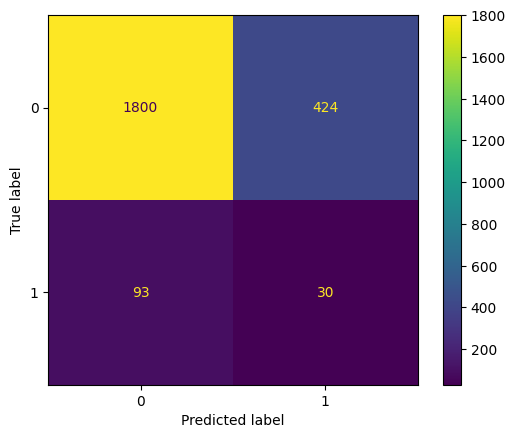

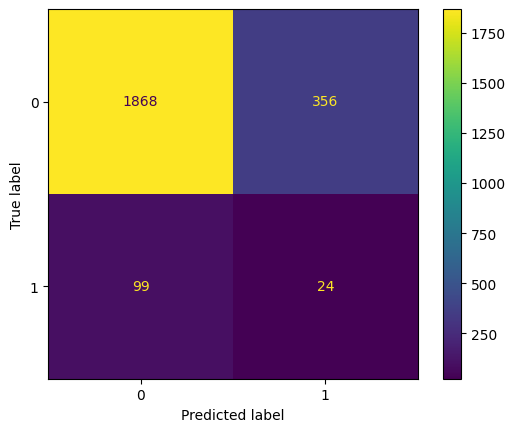

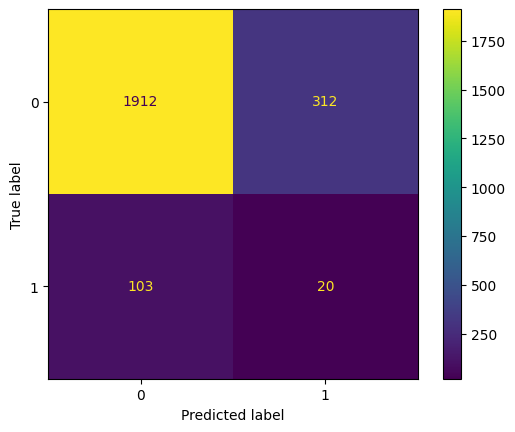

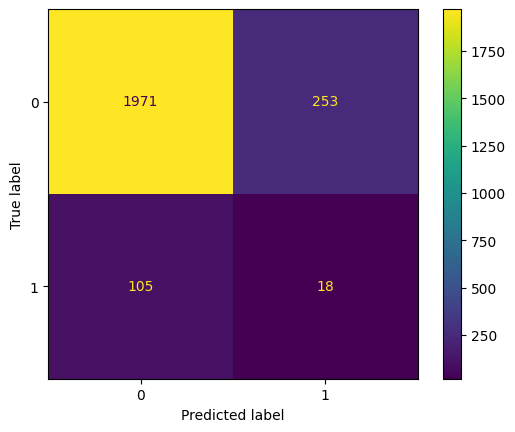

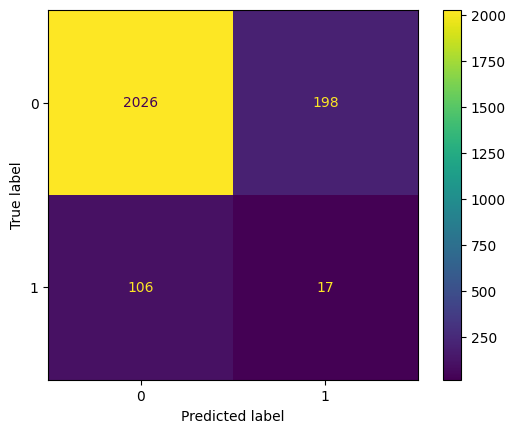

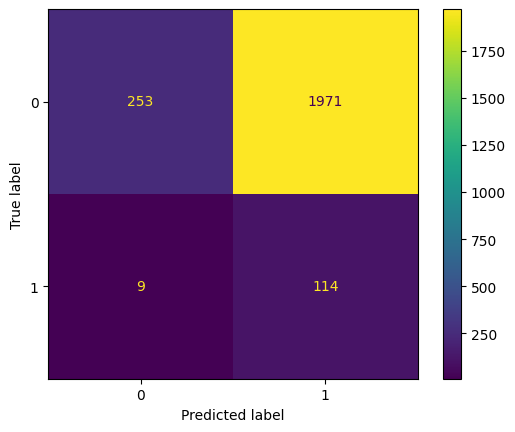

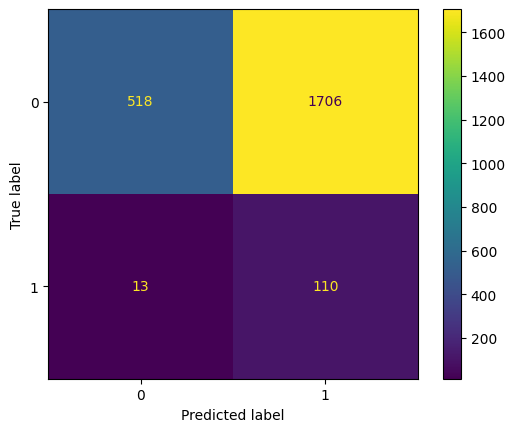

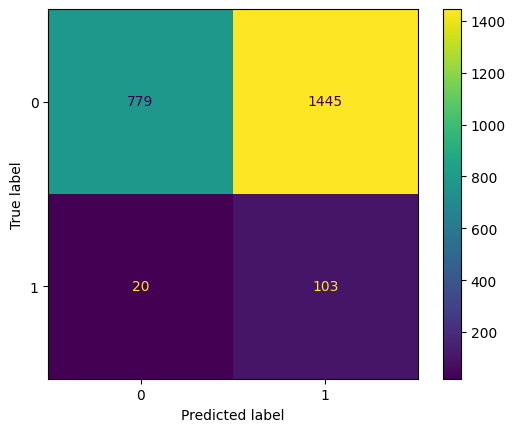

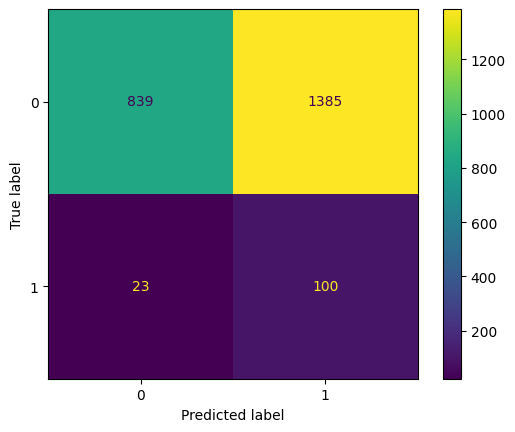

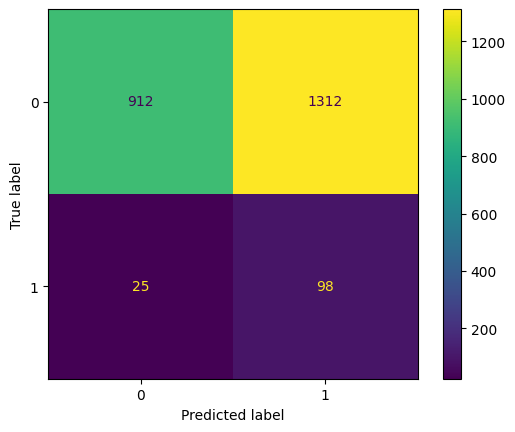

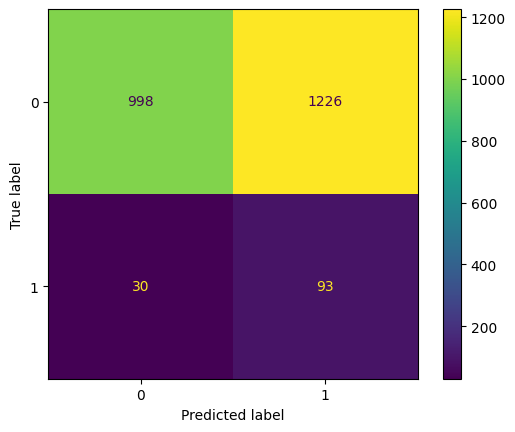

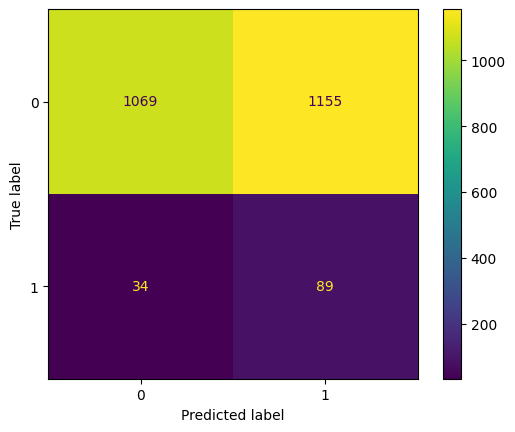

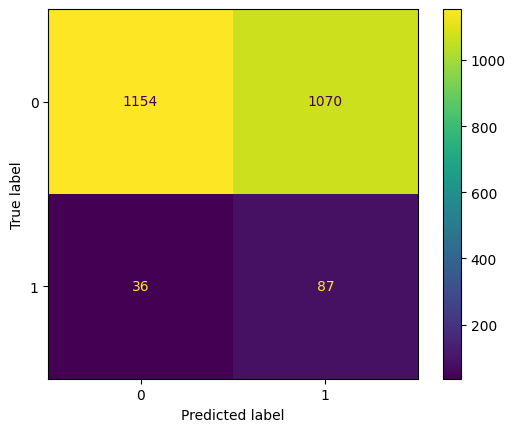

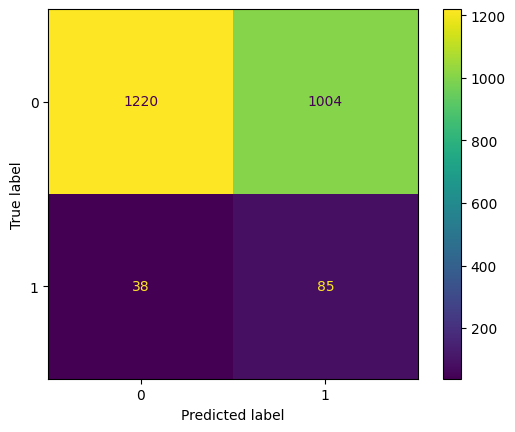

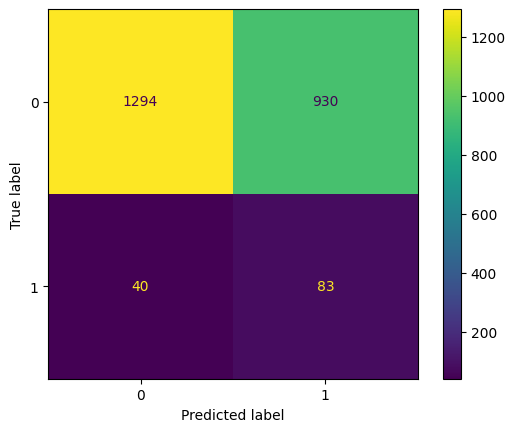

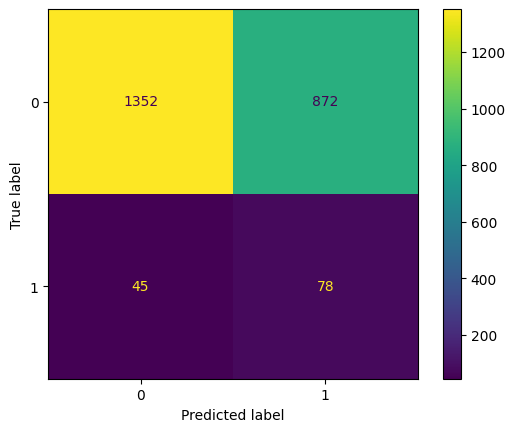

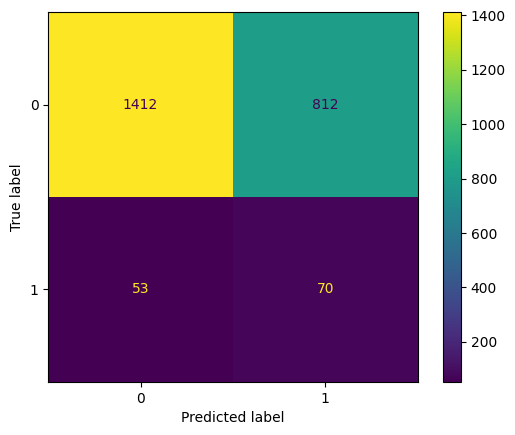

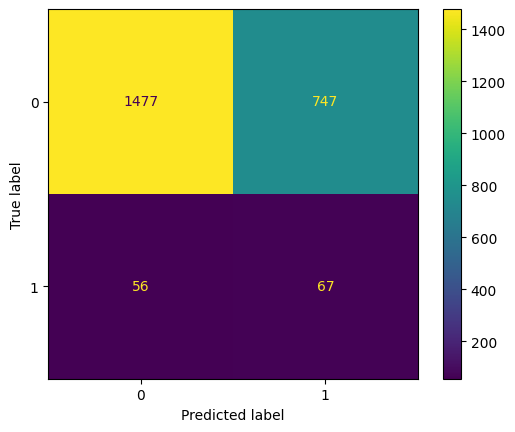

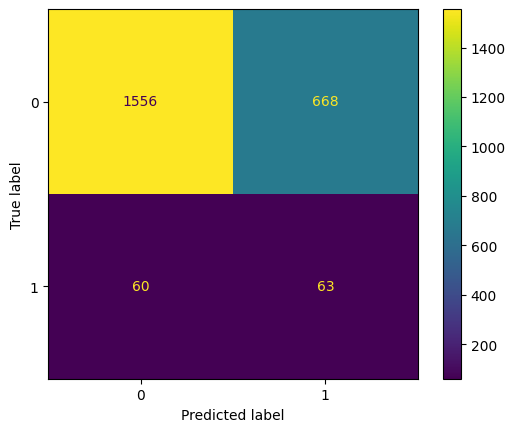

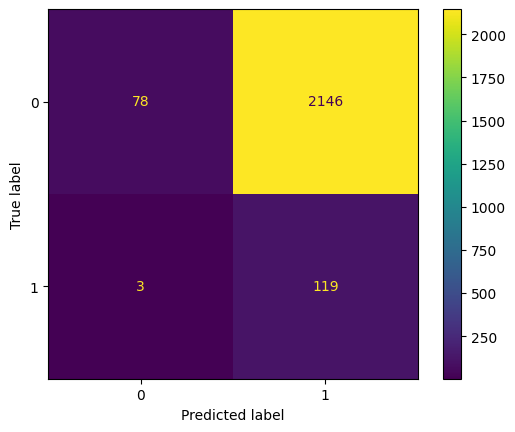

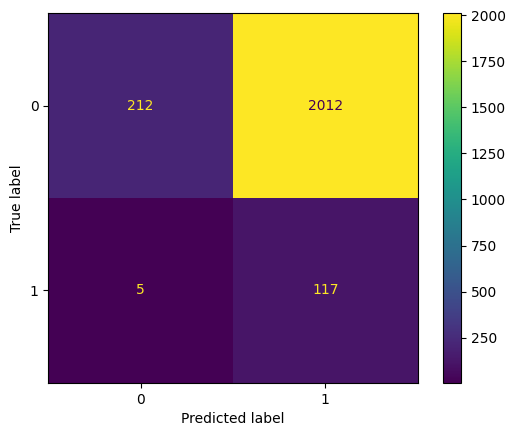

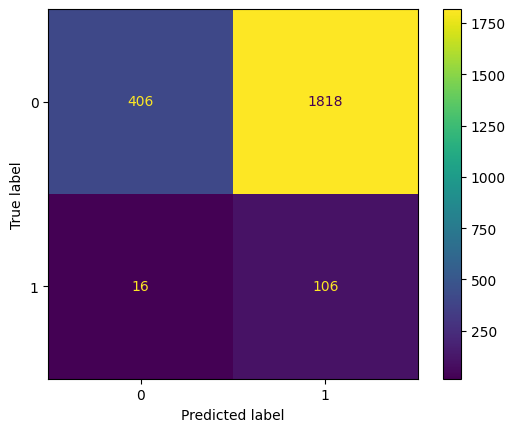

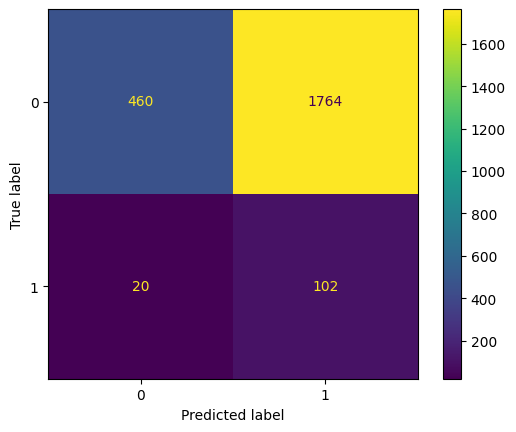

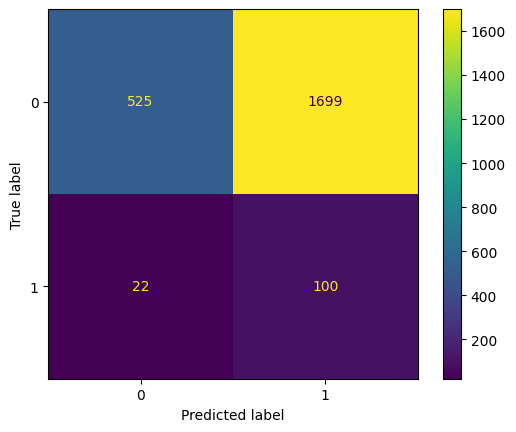

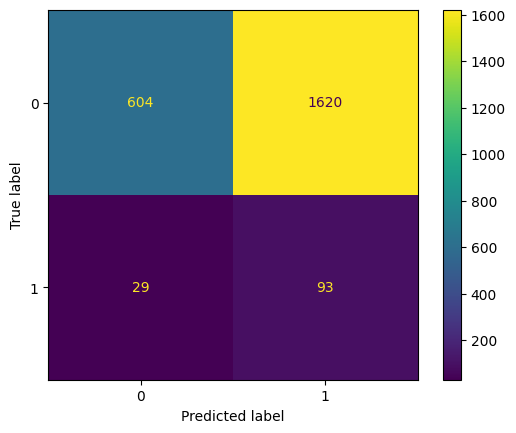

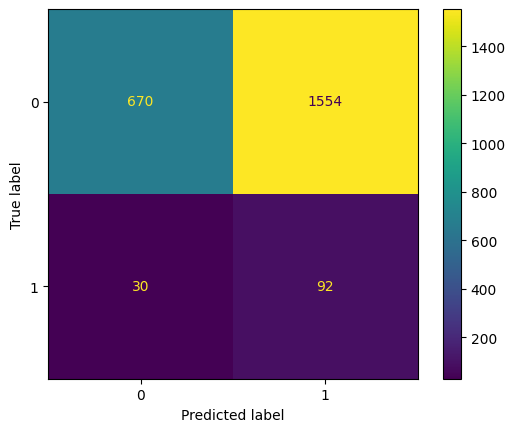

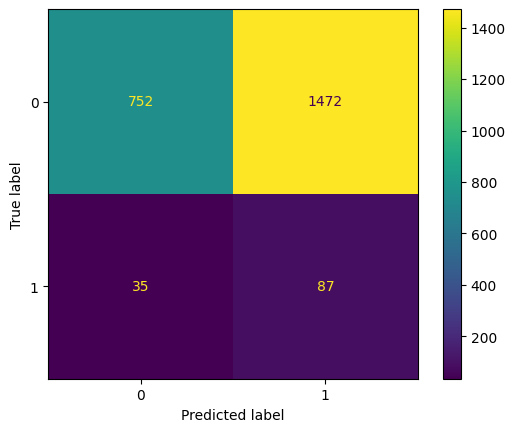

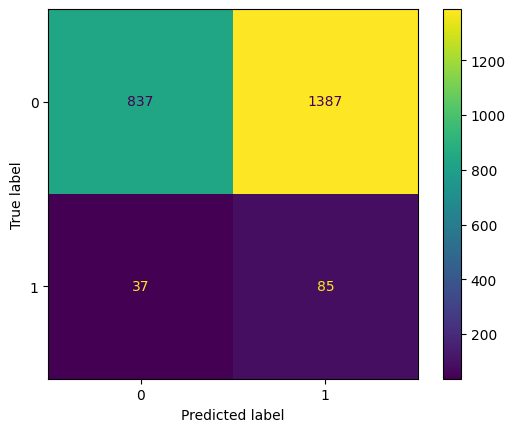

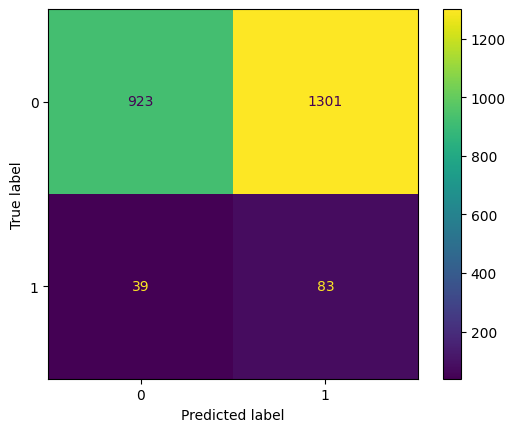

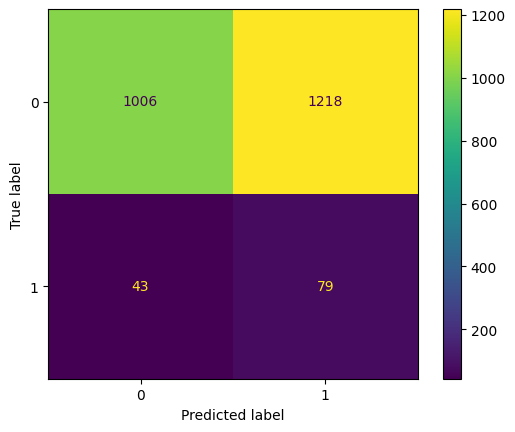

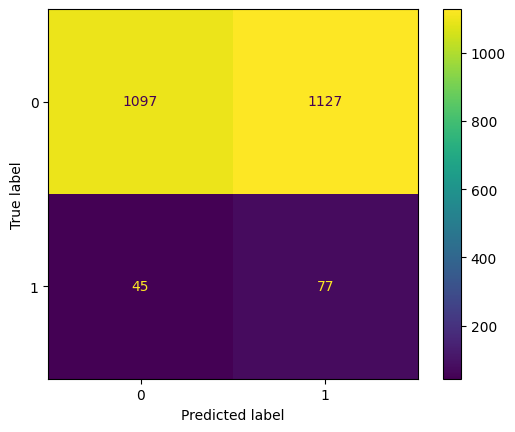

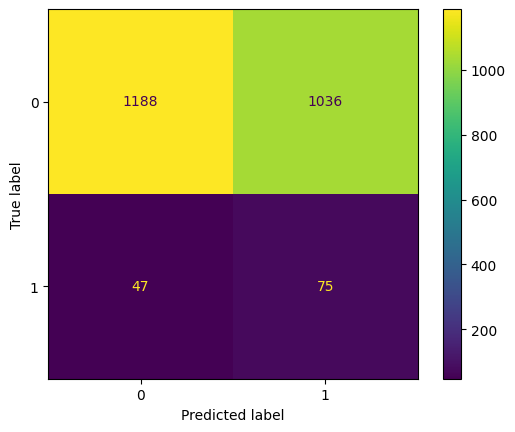

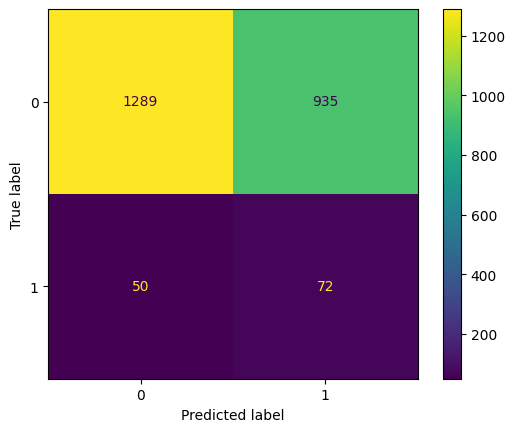

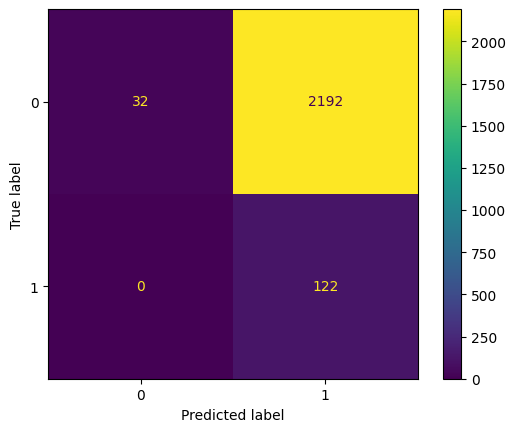

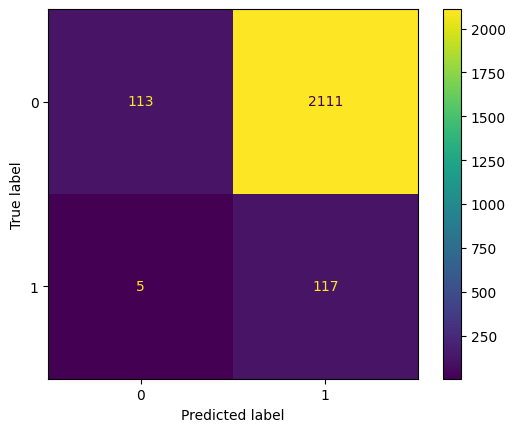

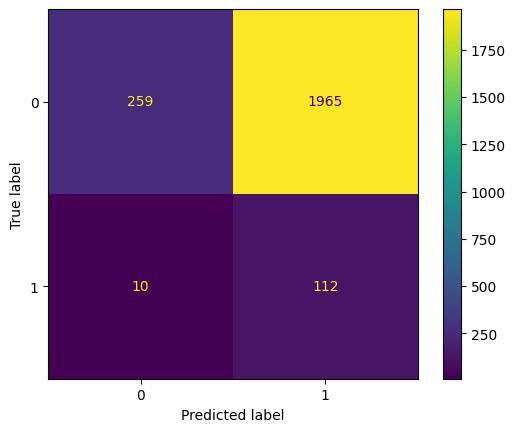

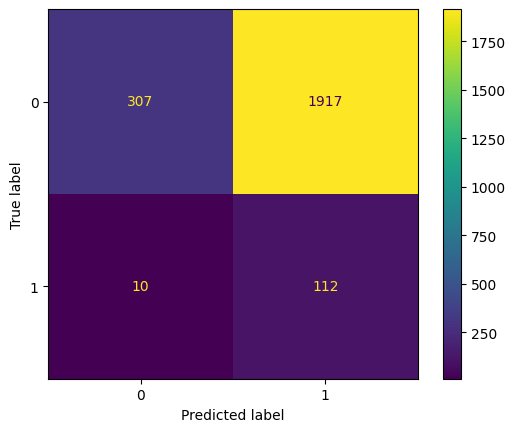

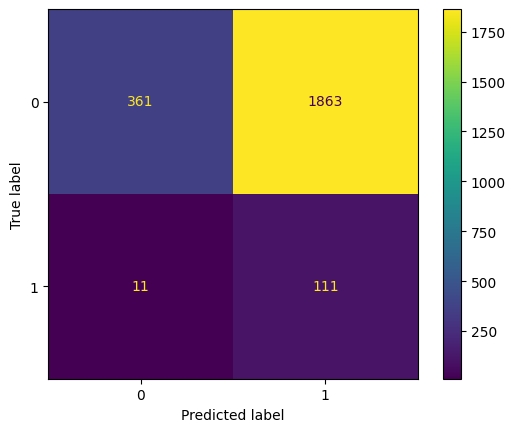

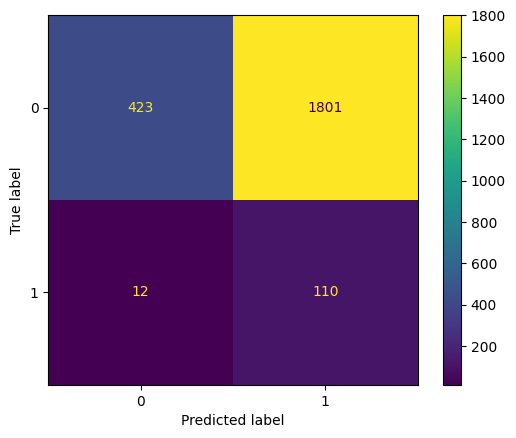

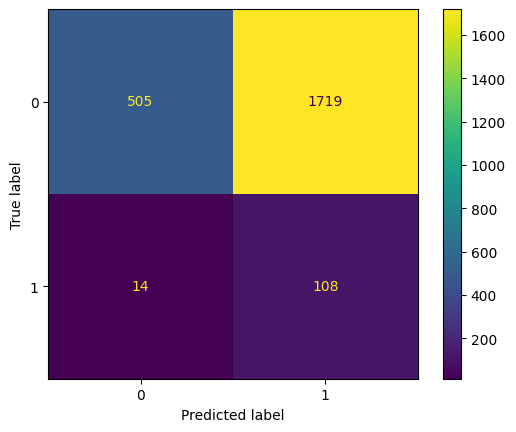

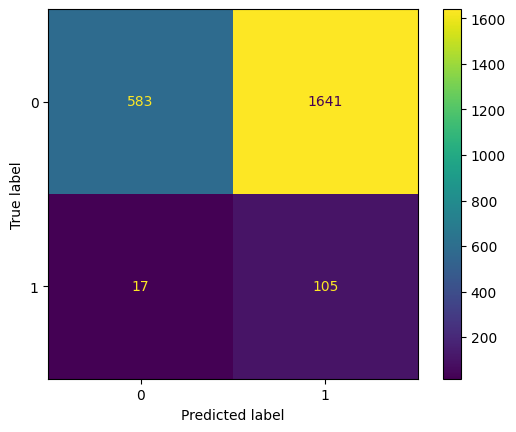

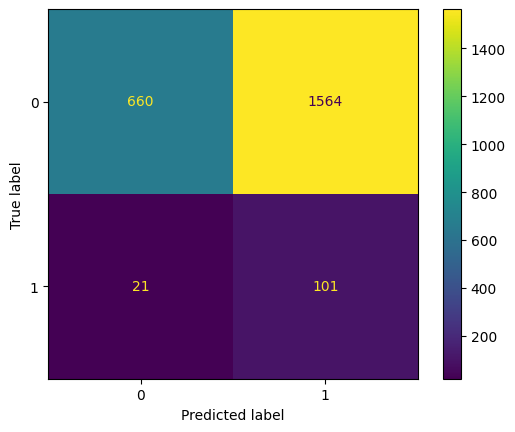

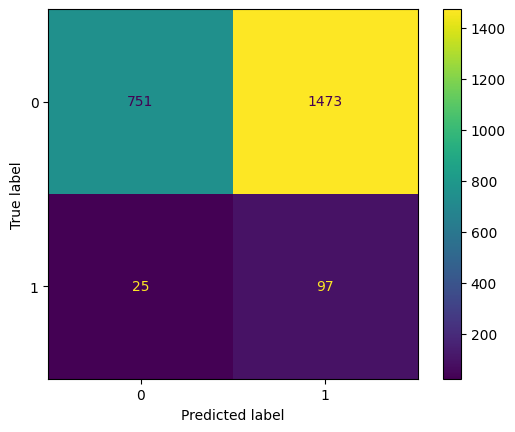

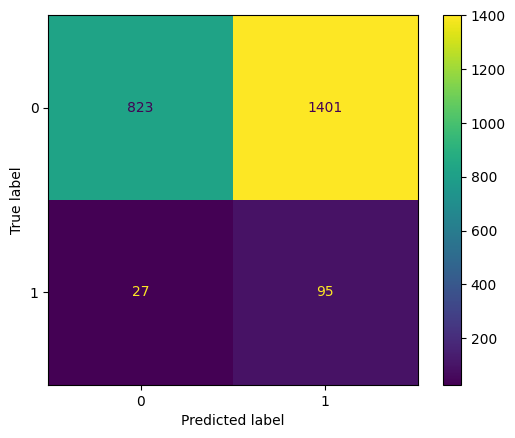

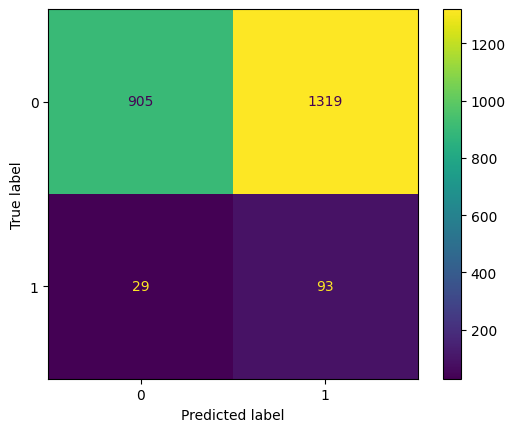

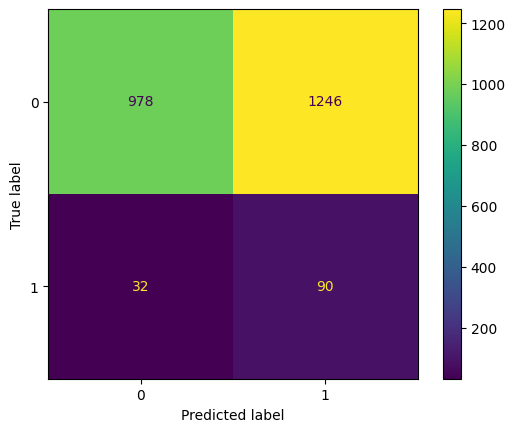

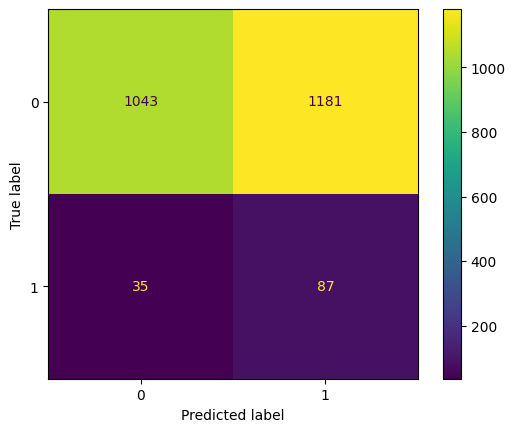

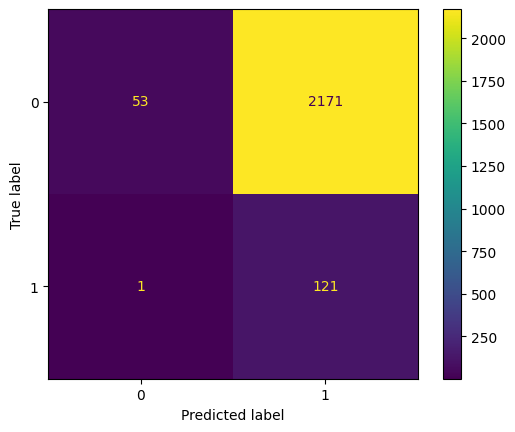

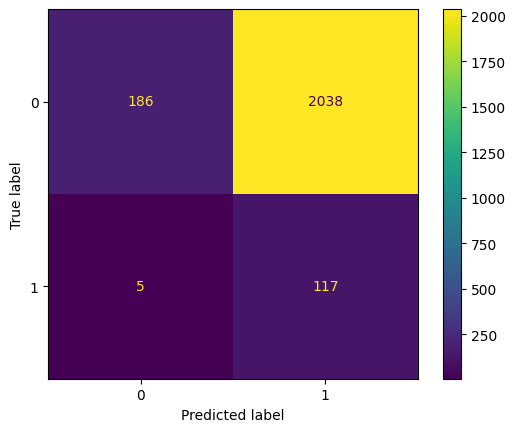

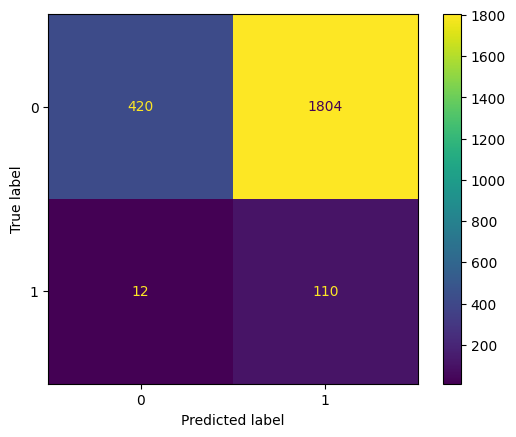

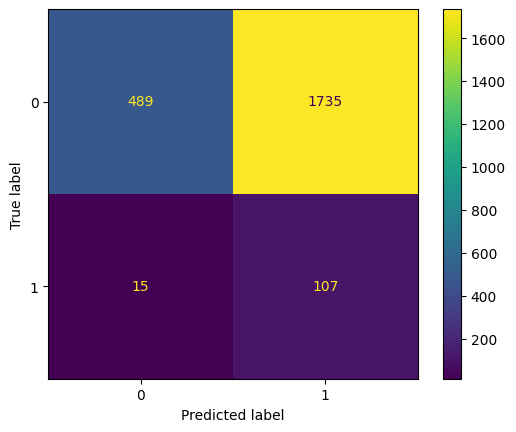

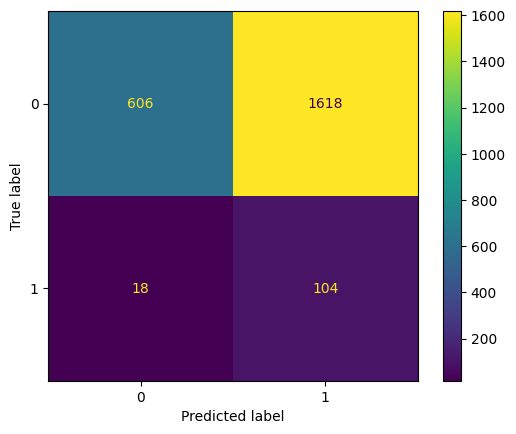

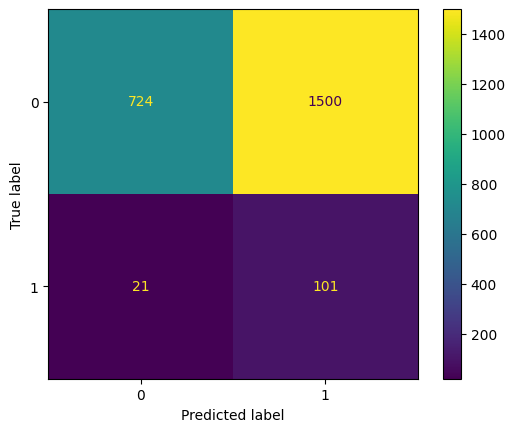

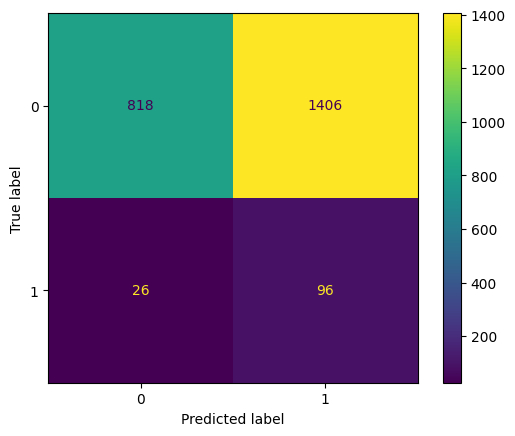

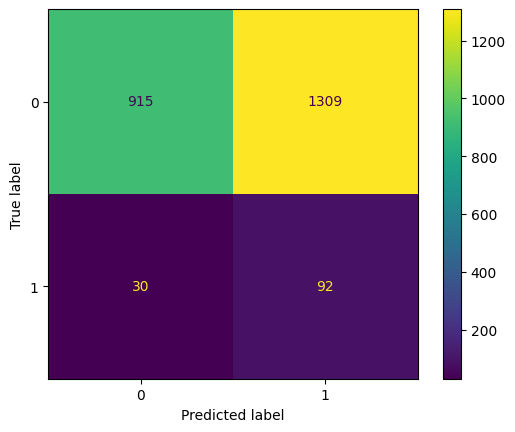

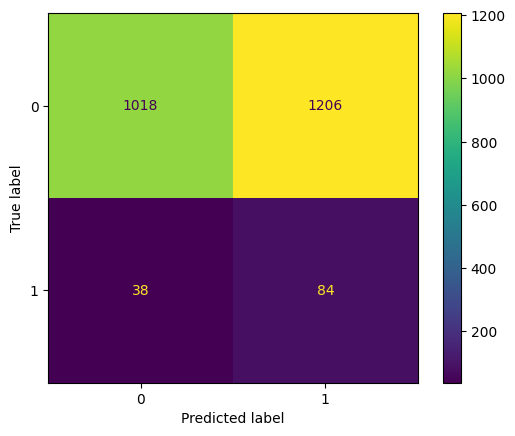

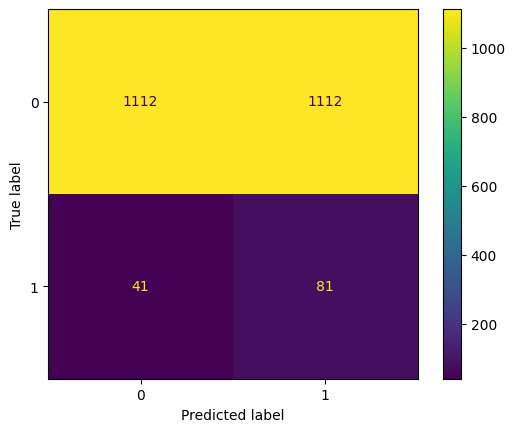

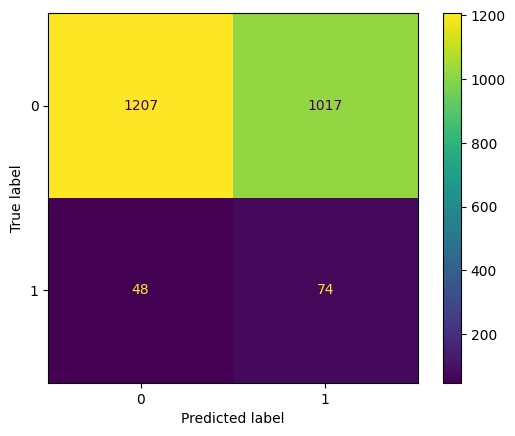

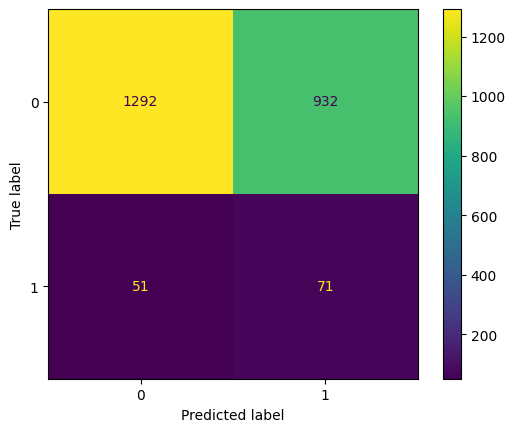

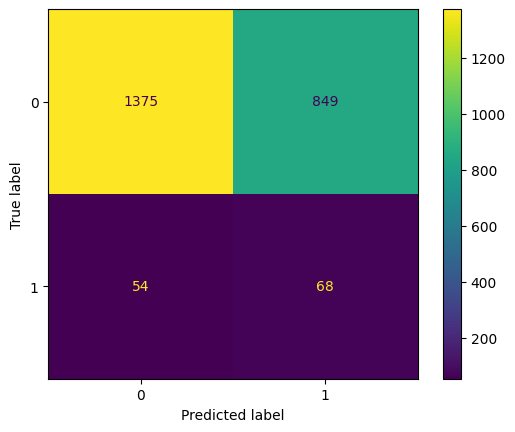

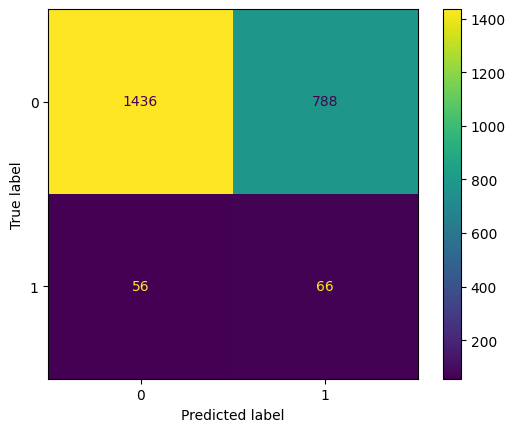

In [32]:
#11 - main

#set variables -------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#path dataset
separator = ';'
url_data = "data/24h/sharp_abcmx-2010-01-01_2024-04-30.csv"

#Coluns Delete in CSV file
list_col_delete = ['DATE','DATE_S','DATE_B','DATE__OBS','DATE-OBS','T_OBS','OBS_VR', 'QUALITY', 'Class_Flare']

#Attributes' redution Bobra
#list_col_delete = ['DATE','DATE_S','DATE_B','DATE__OBS','DATE-OBS','T_OBS','OBS_VR', 'QUALITY', 'Class_Flare', 'MEANGAM','MEANGBT','MEANGBZ','MEANSHR','MEANGBH','MEANJZH', 'MEANJZD','MEANALP'] 

date_chronological_empty = []
#date_chronological = ["2010-01-01 00:00:00", "2014-10-26 23:59:00", "2014-10-27 00:00:00", "2015-10-30 23:59:00", "2015-10-31 00:00:00", "2023-12-31 23:59:00"]

#date A1 - 2010-2011
date_chronological_A1 = ["2010-05-03 00:00:00", "2010-10-31 23:59:59", "2011-06-01 00:00:00", "2011-12-31 23:59:59", "2010-11-01 00:00:00", "2011-01-31 23:59:59", "2011-02-21 00:00:00", "2011-05-31 23:59:59"]

#date A2 - 2012 - 2013
date_chronological_A2 = ["2012-01-01 00:00:00", "2012-08-31 23:59:59", "2013-07-01 00:00:00", "2014-08-31 23:59:59", "2012-09-01 00:00:00", "2013-01-31 23:59:59", "2013-02-01 00:00:00", "2013-06-30 23:59:59"]

#date A3  - 2014-2016
date_chronological_A3 = ["2014-09-01 00:00:00", "2015-03-31 23:59:59", "2015-10-01 00:00:00", "2016-06-30 23:59:59", "2015-04-01 00:00:00", "2015-06-30 23:59:59", "2015-07-01 00:00:00", "2015-09-30 23:59:59"]

#date A4 - 2016-2018
date_chronological_A4 = ["2016-07-01 00:00:00", "2017-02-28 23:59:59", "2017-09-01 00:00:00", "2018-07-31 23:59:59", "2017-03-01 00:00:00", "2017-05-31 23:59:59", "2017-06-01 00:00:00", "2017-08-31 23:59:59"]

#set parameters before training
set_experiment = 108
set_dataset_base = "abcmx"
set_window = "24h"
set_epoch  = 1
set_batch = 8
set_model_name = ['transformers'] # ['mlp', 'svm','lstm','transformers']
set_dataset_part = ['all'] #['all', 'A1', 'A2', 'A3', 'A4']
set_balancing = ['weight'] # ['weight', 'undersampling', 'oversampling', 'smote']


#set transformers parameters
head_size=256 #256
num_heads=8 #4
ff_dim=1024 #4
num_transformer_blocks=8#4
mlp_units=[128] #128
mlp_dropout=0.1 #0.4 
dropout=0.1  #0.25
 

loss_function = "binary_crossentropy"
loss_function_text = "binary_crossentropy"

optimizer = keras.optimizers.Adam(learning_rate=1e-5)
optimizer_text = "Adam learning_rate 1e-5"

model_checkpoint_fraud = [keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.keras")]
early_stopping = early_stopping('val_auc', 5, 1, True)  


callbacks_text = "early stopping e model_checkpoint_fraud"
callbacks  = [early_stopping, model_checkpoint_fraud]



observation = ""


transformers_parameters = []
transformers_parameters.append(head_size)
transformers_parameters.append(num_heads)
transformers_parameters.append(ff_dim)
transformers_parameters.append(num_transformer_blocks)
transformers_parameters.append(mlp_units)
transformers_parameters.append(mlp_dropout)
transformers_parameters.append(dropout)
transformers_parameters.append(loss_function)
transformers_parameters.append(optimizer)
transformers_parameters.append(callbacks)

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#config datetime format    
#custom_date_parser = lambda x: datetime.strptime(x, "%Y.%m.%d_%H:%M:%S_TAI") 
custom_date_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S') 
 
#load csv 
raw_df = pd.read_csv(url_data, sep=separator)
#raw_df['T_REC'] = pd.to_datetime(raw_df['T_REC'], format='%Y-%m-%d %H:%M:%S')

date1 = pd.to_datetime(raw_df['T_REC'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
date2 = pd.to_datetime(raw_df['T_REC'], errors='coerce', format='%Y-%m-%d')
raw_df['T_REC'] = date1.fillna(date2)
raw_df.sort_values(by='T_REC')


#delete unused columns
for lcd in list_col_delete:
    raw_df.pop(lcd)
    

#drop nan values
print("Lenght before drop nan values: ", len(raw_df))
raw_df.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_df.dropna(subset=raw_df.columns, inplace=True)
raw_df.drop
print("Lenght after drop nan values: ", len(raw_df))


#convert pandas' dataset to dask dataframe
cleaned_df = dd.from_pandas(raw_df, npartitions=10)


#count row class
neg = len(cleaned_df [cleaned_df.Class == 0])
pos = len(cleaned_df [cleaned_df.Class == 1])


#training models
for smn in set_model_name:

    for sdb in set_dataset_part:
       
        for sba in set_balancing:
            print(set_experiment, ' - ', sdb, ' - ', set_window,  ' - ', set_batch,  ' - ', set_epoch, ' - ', smn,  ' - ', sba,  ' - ')
            
            #salva detalhes do experimento
            experiment_list = []
            experiment_list.append(set_experiment)
            experiment_list.append(set_dataset_base)
            experiment_list.append(set_window)
            experiment_list.append(smn)
            experiment_list.append(sba)
            experiment_list.append(sdb)
            experiment_list.append(set_batch)
            experiment_list.append(set_epoch)
            experiment_list.append(head_size)
            experiment_list.append(num_heads)
            experiment_list.append(ff_dim)
            experiment_list.append(num_transformer_blocks)
            experiment_list.append(mlp_units)
            experiment_list.append(mlp_dropout)
            experiment_list.append(dropout)
            experiment_list.append(loss_function_text)
            experiment_list.append(optimizer_text)
            experiment_list.append(callbacks_text)
            experiment_list.append(observation)


            df_experiment = pd.DataFrame(experiment_list).T

            df_experiment.columns = ["experiment", "dataset", "window", "model", "balancing", "dataset_part", "batch", "epoch", "head_size", "num_heads", "ff_dim", "n_trans_blocks", "mlp_units", "mlp_dropout", "dropout", "loss_funcion", "optimizer", "callbacks", "observation" ]

            
            if os.path.isfile('data/experiment_information.csv'):
                df_experiment.to_csv('data/experiment_information.csv', index= False, header=False, mode = 'a')
            else:
                df_experiment.to_csv('data/experiment_information.csv', index= False, header=True, mode = 'a')
            
            
        
            if sdb == 'all':
                execute_all_models(set_experiment, sdb, set_window, set_batch, set_epoch, cleaned_df, smn, sba, "kfold", date_chronological_empty, transformers_parameters)
                
                thoud = [0.30, 0.35, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50]
                for th2 in thoud:
                    average_standard_derivation(set_experiment, set_dataset_base, set_window, set_model_name, set_balancing, "kfold", set_batch, set_epoch, th2)
                    
            elif sdb == 'A1':
                execute_all_models(set_experiment, sdb, set_window, set_batch, set_epoch, cleaned_df, smn, sba, "chronological", date_chronological_A1, transformers_parameters)
            elif sdb == 'A2':
                execute_all_models(set_experiment, sdb, set_window, set_batch, set_epoch, cleaned_df, smn, sba, "chronological", date_chronological_A2, transformers_parameters)
            elif sdb == 'A3':
                execute_all_models(set_experiment, sdb, set_window, set_batch, set_epoch, cleaned_df, smn, sba, "chronological", date_chronological_A3, transformers_parameters)
            elif sdb == 'A4':
                execute_all_models(set_experiment, sdb, set_window, set_batch, set_epoch, cleaned_df, smn, sba, "chronological",  date_chronological_A4, transformers_parameters)
           
            
            


In [ ]:

    
    
    

    
    

 

    # 5. Salvar o resultado filtrado em um novo CSV (opcional)
    #filtro.to_csv('registros_filtrados.csv', index=False)